In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
% precision 2
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import statsmodels.api as sm

#### Linear Regression using Boston Housing Data

We will use data about house prices in the suburbs of Boston collected in 1978 and  made [freely available](https://archive.ics.uci.edu/ml/datasets/Housing). Please make yourself familiar with the [data dictionary](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names).

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per USD10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in USD1000's

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222.00,18.70,396.90,5.33,36.20


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


##### Show the key descriptive statistics for all variables

In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


##### Take a closer look at individual variables to understand their characteristics

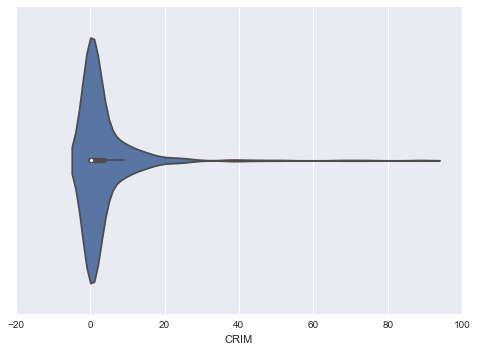

In [7]:
sns.violinplot(df.CRIM);
#mashup of histogram and boxplot
#boxplot is the horizontal box at the center
#top and bottom are mirrors
#shows density within Interquartile range, and extremes of outliers

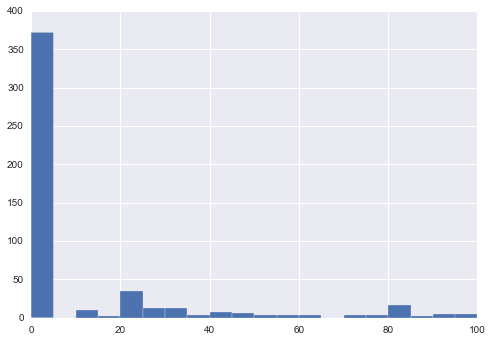

In [6]:
df.ZN.hist(bins=20);

In [8]:
df.CRIM.value_counts()

14.33    2
0.02     2
12.25    1
6.96     1
0.33     1
1.61     1
0.22     1
1.15     1
0.03     1
51.14    1
0.61     1
0.11     1
0.38     1
5.87     1
41.53    1
0.10     1
0.33     1
0.13     1
3.54     1
8.72     1
14.44    1
0.61     1
0.26     1
4.22     1
0.98     1
0.19     1
9.34     1
0.03     1
0.23     1
4.84     1
        ..
0.63     1
0.07     1
0.07     1
0.63     1
0.06     1
2.82     1
0.10     1
15.58    1
0.07     1
4.04     1
0.20     1
0.02     1
0.11     1
2.73     1
73.53    1
1.43     1
0.04     1
0.03     1
0.06     1
0.11     1
0.08     1
1.46     1
7.99     1
3.67     1
20.72    1
0.03     1
0.41     1
2.45     1
0.07     1
0.13     1
Name: CRIM, dtype: int64

In [7]:
df.CRIM.value_counts().sort_index()
#value_counts() tells you how many of that value exist

0.01     1
0.01     1
0.01     1
0.01     1
0.01     1
0.01     1
0.01     1
0.01     1
0.01     1
0.02     2
0.02     1
0.02     1
0.02     1
0.02     1
0.02     1
0.02     1
0.02     1
0.02     1
0.02     1
0.02     1
0.02     1
0.03     1
0.03     1
0.03     1
0.03     1
0.03     1
0.03     1
0.03     1
0.03     1
0.03     1
        ..
15.02    1
15.18    1
15.29    1
15.58    1
15.86    1
15.87    1
16.81    1
17.87    1
18.08    1
18.50    1
18.81    1
19.61    1
20.08    1
20.72    1
22.05    1
22.60    1
23.65    1
24.39    1
24.80    1
25.05    1
25.94    1
28.66    1
37.66    1
38.35    1
41.53    1
45.75    1
51.14    1
67.92    1
73.53    1
88.98    1
Name: CRIM, dtype: int64

##### What can you learn from these metrics about the distribution of the variables?

##### Answer:

##### Standardize the data

In [9]:
df_std = df.apply(lambda x: (x-x.mean())/(x.std()), axis=0)
#lambda is an on the fly function - say lambda, then the argument for the function - in this case, x
#use only for functions with one argument

In [10]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
df_std2 = stdsc.fit_transform(df)
df_std2 = pd.DataFrame(df_std2,columns = df.columns)

In [11]:
df_std2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.42,0.28,-1.29,-0.27,-0.14,0.41,-0.12,0.14,-0.98,-0.67,-1.46,0.44,-1.08,0.16
1,-0.42,-0.49,-0.59,-0.27,-0.74,0.19,0.37,0.56,-0.87,-0.99,-0.30,0.44,-0.49,-0.10
2,-0.42,-0.49,-0.59,-0.27,-0.74,1.28,-0.27,0.56,-0.87,-0.99,-0.30,0.40,-1.21,1.32
3,-0.42,-0.49,-1.31,-0.27,-0.84,1.02,-0.81,1.08,-0.75,-1.11,0.11,0.42,-1.36,1.18
4,-0.41,-0.49,-1.31,-0.27,-0.84,1.23,-0.51,1.08,-0.75,-1.11,0.11,0.44,-1.03,1.49


##### Visualize the distribution of the standardized data using [sns.violinplot](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.violinplot.html#seaborn.violinplot)

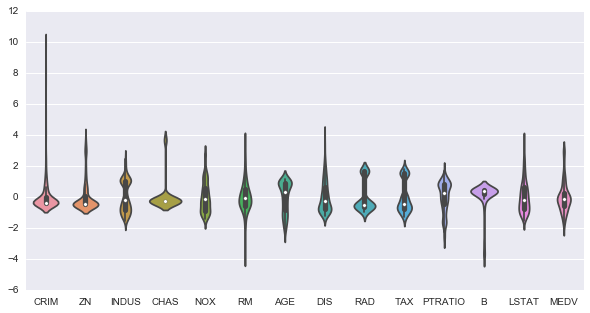

In [12]:
plt.figure(figsize=(10,5))
sns.violinplot(data=df_std);

##### Use [sns.pairplot](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn-pairplot) to view (selected) pairwise correlations

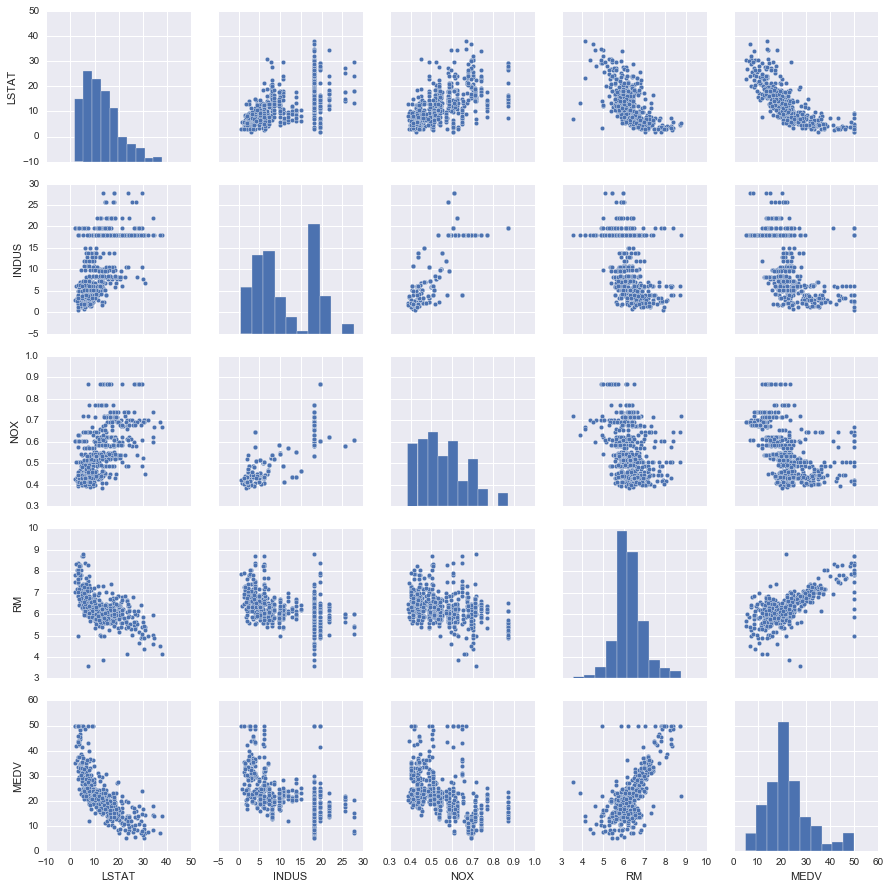

In [25]:
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], size=2.5);
#pass it a df and it will give you every single pairwise scatterplot
#this is super cool - you will use this
#a quick look at relationships between your variables

##### Use [sns.heatmap](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html) to plot the correlation matrix as heatmap (see alternatives [here](https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html) and [here](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.clustermap.html)). Make sure to show the coefficients!

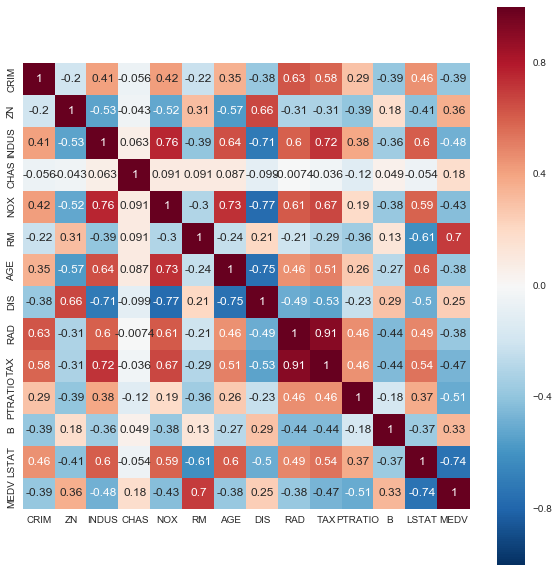

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), square=True, annot=True, annot_kws={'size': 12});

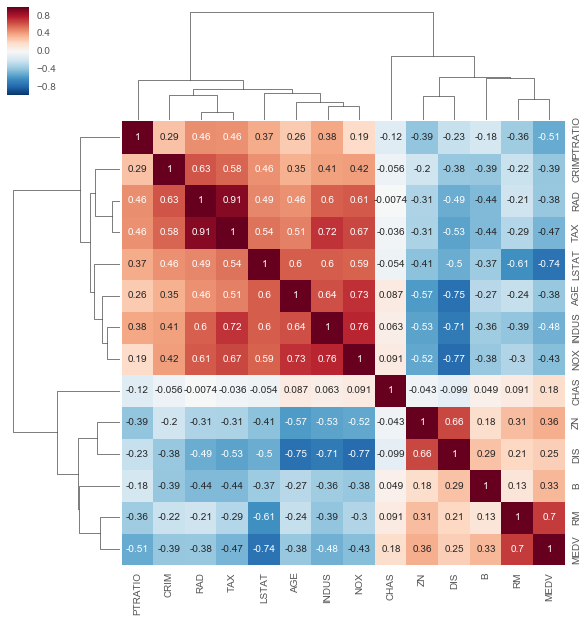

In [281]:
sns.clustermap(df.corr(), annot=True);

##### What did you learn?

##### Run a linear regression using `statsmodels`

In [15]:
y = df.MEDV
X = sm.add_constant(df.drop('MEDV', axis=1)) #need to add an intercept; that's what sm.add_constant does
#.drop removes the MEDV row because it's the one we're trying to predict
model = sm.OLS(endog=y, exog=X) #endogenous #exogenous
result = model.fit()
result.summary()
#trying to predict MEDV (value of home)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 25 Oct 2016   Prob (F-statistic):          6.72e-135
Time:                        19:42:27   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000        26.432    46.487
CRIM          -0.1080      0.033     -3.287      0.001        -0.173    -0.043
ZN             0.0464      0.014      3.382      0.001         0.019     0.073
INDUS          0.0206      0.061      0.334      0.738        -0.100     0.141
CHAS           2.6867      0.862      3.118      0.002         0.994     4.380
NOX          -17.7666      3.820     -4.651      0.000       -25.272   -10.262
RM             3.8099      0.418      9.116      0.000         2.989     4.631
AGE            0.0007      0.013      0.052      0.958        -0.025     0.027
DIS           -1.4756      0.199     -7.398      0.000        -1.867    -1.084
RAD            0.3060      0.066      4.613      0.000         0.176     0.436
TAX           -0.0123      0.004     -3.280      0.001        -0.020    -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000        -1.210    -0.696
B              0.0093      0.003      3.467      0.001         0.004     0.015
LSTAT         -0.5248      0.051    -10.347      0.000        -0.624    -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Optional: Expore [sns.coefplot](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.coefplot.html#seaborn.coefplot) for a quick visualization of the coefficients. 

In [29]:
' + '.join(sm.add_constant(X).columns)

'const + CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT'

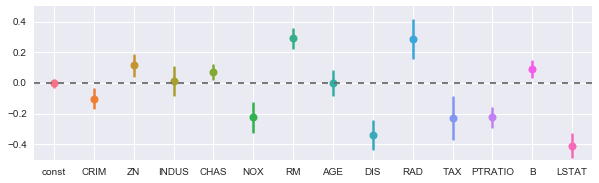

In [30]:
sns.coefplot(data=sm.add_constant(df_std), formula='{} ~ {}'.format(y.name, ' + '.join(sm.add_constant(X).columns)))
#.format we will see all the time


##### Examine the model residuals: get key distribution metrics, plot histogram

In [32]:
# null is that it comes from normal

DescribeResult(nobs=506, minmax=(-15.594473899695032, 26.199270977908522), mean=9.3086715323195734e-14, variance=21.938187283079159, skewness=1.5207130459846536, kurtosis=5.281482435907616)
2.18203753917e-39


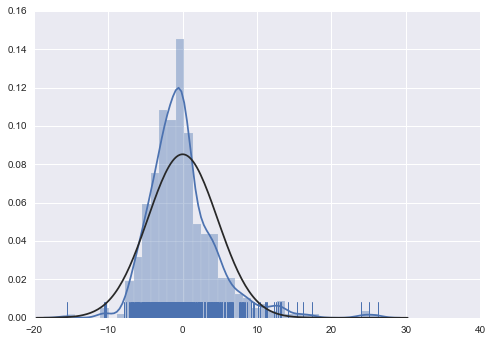

In [31]:
from scipy.stats import norm, normaltest, describe
sns.distplot(result.resid, fit=norm, rug=True);
print describe(result.resid)
stat, p = normaltest(result.resid) #normaltest is that null is a normal distribution
print p
#small p value rejects null hypothesis

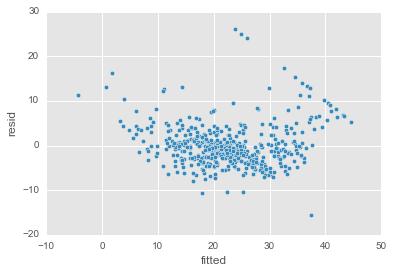

In [93]:
results = pd.DataFrame({'resid': result.resid, 'fitted': result.predict()})
results.plot.scatter(x='fitted', y='resid');
#plotting predicted y values against residuals
#residuals should not have relationship to our predictions

##### Optional: explore the statsmodels [regression diagnostics](http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/regression_diagnostics.html)

##### Optional: Partial Regression Analysis

In [99]:
# medv ~ everything but crime
y = df['MEDV']
X = sm.add_constant(df.drop(['CRIM', 'MEDV'], axis=1))
model_1 = OLS(endog=y, exog=X).fit()

In [100]:
# crim ~ all others
model_2 = OLS(endog=df['CRIM'], exog=X).fit()

In [104]:
model_3 = OLS(endog=model_1.resid, exog=sm.add_constant(pd.Series(model_2.resid, name='CRIM'))).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     11.06
Date:                Sun, 31 Jul 2016   Prob (F-statistic):           0.000944
Time:                        17:09:38   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3002.
Df Residuals:                     504   BIC:                             3010.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       2.444e-14      0.208   1.17e-13      1.000        -0.409     0.409
CRIM          -0.1080      0.032     -3.326      0.001        -0.172    -0.044
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                         6.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
partial_regression = pd.concat([df[['MEDV', 'CRIM']], pd.DataFrame({'resid': model_3.resid, 'fitted': model_3.predict()})], axis=1)

In [55]:
partial_regression.head()

,MEDV,CRIM,fitted,resid
0,24.00,0.01,-0.21,-3.43
1,21.60,0.03,-0.17,-1.72
2,34.70,0.03,-0.28,2.58
3,33.40,0.03,-0.28,3.36
4,36.20,0.07,-0.22,5.08


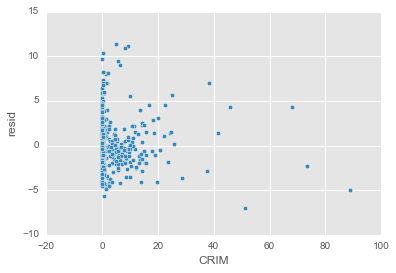

In [107]:
partial_regression.plot.scatter(x='CRIM', y='resid')

##### Linear Regression using Scikit Learn 

Estimate the mean squared prediction error using sklearn & 5-fold cross validation

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score

linear_regression = LinearRegression()
X = df.drop('MEDV', axis=1) 
y = df['MEDV']

#documented as negatives for maximizing
lr_mse = -cross_val_score(estimator=linear_regression, 
                         X=X, y=y, cv=5, scoring='mean_squared_error')
#reason it's set to negative is because it's easier (for some reason)
#cv = cross validation # of folds
#scoring - what metric you want to 
print np.mean(lr_mse) #overall performance of your model
print np.std(lr_mse)

37.1318074677
23.0919453357


In [38]:
lr_mse

array([ 12.46,  26.05,  33.07,  80.76,  33.31])

##### Compare with Lasso & Ridge, using 5-fold CV to optimize regularization

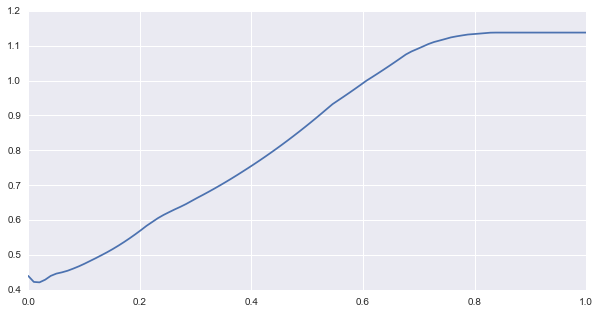

In [40]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import scale
alphas = np.linspace(0.0000001, 1, 100)
model = LassoCV(cv=5, alphas=alphas).fit(X=scale(X), y=scale(y))
mse_path = np.mean(model.mse_path_, axis=1)
plt.figure(figsize=(10,5))
plt.plot(model.alphas_, mse_path);
#alphas refers to paramter for regularization

##### Optional: explore sklearn.linear_model.lasso_path

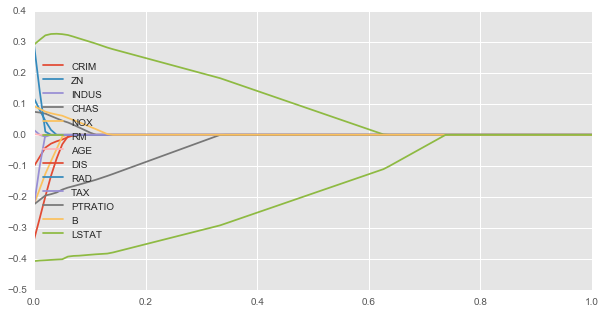

In [189]:
from sklearn.linear_model import lasso_path
alphas, coefs, _ = lasso_path(X=scale(X), y=scale(y), alphas=alphas)
coef_path = pd.DataFrame(data=coefs.T, index=alphas, columns=X.columns)
coef_path.sort_index().plot(figsize=(10,5));

##### Ridge Regression: Find optimal regularization parameter and corresponding MSE score

In [ ]:
#lasso L1 - uses absolute differences
#Ridge L2 - 2 for squared, uses the squared differences
#eliminate features = lasso


In [21]:
from sklearn.linear_model import Ridge

alphas = np.logspace(-2, 3, 100)
model = Ridge()

score, coefs = {}, {} #creates 2 empty dictionaries
for a in alphas: #for every alpha in array, set
    model.set_params(alpha=a)
    mse = -cross_val_score(estimator=model, 
                         X=X, y=y, cv=5, scoring='mean_squared_error')
    score[a] = [np.mean(mse), np.std(mse)] #keys are the alphas, the a in brackets, then lists of means and stds
    model.fit(X, y)
    coefs[a] = model.coef_
    
print model.coef_

[-0.09  0.05 -0.04  0.1  -0.02  0.57  0.03 -0.61  0.31 -0.02 -0.66  0.01
 -0.76]


mse    29.75
sd     12.47
-2sd    4.82
+2sd   54.69
Name: 155.567614393, dtype: float64

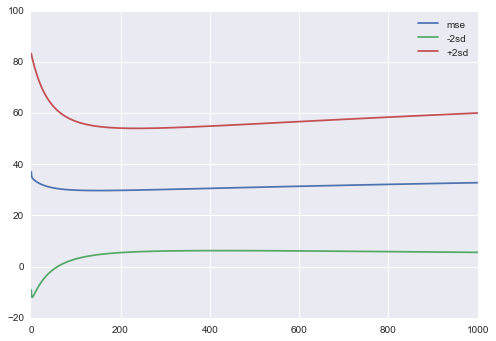

In [44]:
result = pd.DataFrame.from_dict(score).T
result.columns = ['mse', 'sd']
result['-2sd'] = result.mse - 2 * result.sd
result['+2sd'] = result.mse + 2 * result.sd
result.drop('sd', axis=1).plot();
result.loc[result.mse.idxmin()]

In [ ]:
## mse converging as alpha increases

##### Optional: Show ridge coefficient path and optimal coefficients

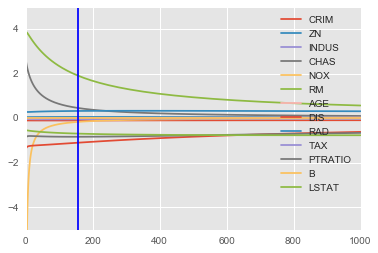

In [256]:
df = pd.DataFrame.from_dict(coeffs).T
df.columns = X.columns
df.plot(ylim=[-5, 5])
plt.axvline(result.mse.idxmin());

##### Find the optimal alpha and L1 ratio for the ElasticNet model

In [56]:
from sklearn.linear_model import ElasticNetCV

alphas = np.linspace(0.01, 10, 100)
l1_ratio = np.linspace(0.01, 0.05, 20)
model = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratio, cv=5).fit(X, y)
mse = np.mean(model.mse_path_, axis=2)
net_result = pd.DataFrame(data=mse, columns=alphas, index=l1_ratio)
min_alpha = net_result.min(axis=0).idxmin()
min_l1_ratio = net_result.min(axis=1).idxmin()
min_alpha, min_l1_ratio, net_result.min().min()

(9.60, 0.01, 29.78)

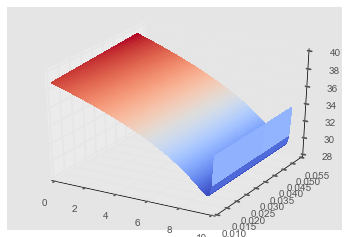

In [346]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')

X_coord, Y_coord = np.meshgrid(alphas, l1_ratio)
surf = ax.plot_surface(X_coord, Y_coord, mse, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False);